In [7]:
import sys
sys.path.append('../src')
import numpy as np
from operators import S_x, S_minus, phi_basis_vecs, rho_basis_ops, id, S_plus
from quantum_system import QuantumSystem
from simulation import N_trajectory_twoLevelSystem, N_trajectory_twoAtomSystem, exact_twoLevelSystem, exact_twoAtomSystem
from utils import dagger, commutator, jump_probability, plot_excitation_density

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider, IntSlider

def run_qjmc_demo(omega=15, gamma=5, N_traj=100, total_time=1.2):
    dt = 0.002
    H = omega * S_x(1,1)
    L = S_minus(1,1)
    system = QuantumSystem(H, gamma, L, dt)
    psi0 = phi_basis_vecs(1)[0]
    states, ne, ne_avg, tlist = N_trajectory_twoLevelSystem(N_traj, psi0, total_time, dt, 0.005, system)
    plot_excitation_density(tlist, ne_avg, f"QJMC: omega={omega}, gamma={gamma}, N={N_traj}", 0)

interact(
    run_qjmc_demo,
    omega=FloatSlider(value=15, min=1, max=30, step=1, description='Omega'),
    gamma=FloatSlider(value=5, min=0.1, max=30, step=0.1, description='Gamma'),
    N_traj=IntSlider(value=100, min=2, max=500, step=1, description='Trajectories'),
    total_time=FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Total Time')
)


In [7]:
states_twoLevelSystem, ne_twoLevelSystem, ne_avg_twoLevelSystem, time_values_twoLevelSystem = N_trajectory_twoLevelSystem(
    3000, phi_basis_vecs(1)[0], total_time, dt, 0.005, twoLevelSystem)

  0%|          | 0/3000 [00:00<?, ?it/s]

100%|██████████| 3000/3000 [01:53<00:00, 26.47it/s] 

Simulation complete


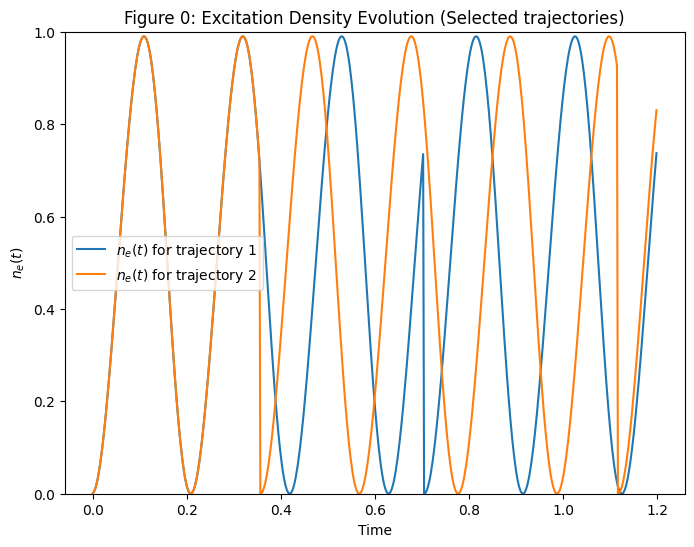

In [8]:
traj_ne_twoLevelSystem = [ne_twoLevelSystem[0], ne_twoLevelSystem[1]]
plot_excitation_density(time_values_twoLevelSystem, traj_ne_twoLevelSystem, 'Figure 0: Excitation Density Evolution (Selected trajectories)', 0)

/usr/local/Caskroom/miniconda/base/envs/qiskit-env/lib/python3.10/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/Caskroom/miniconda/base/envs/qiskit-env/lib/python3.10/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


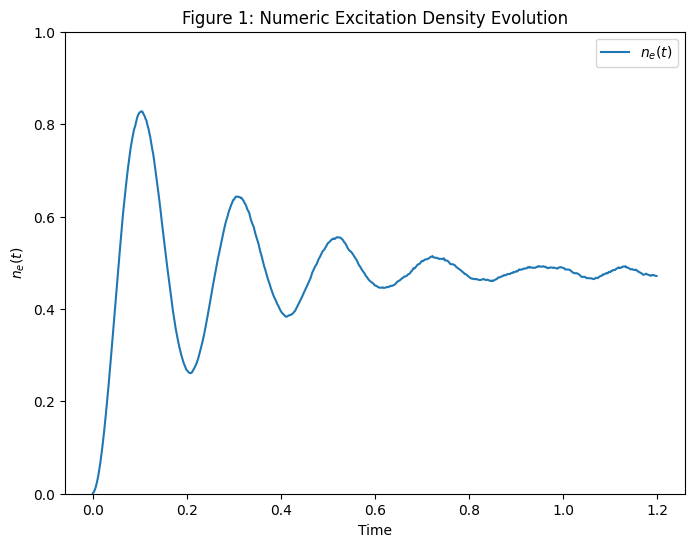

In [9]:
plot_excitation_density(time_values_twoLevelSystem, ne_avg_twoLevelSystem, 'Figure 1: Numeric Excitation Density Evolution', 0)

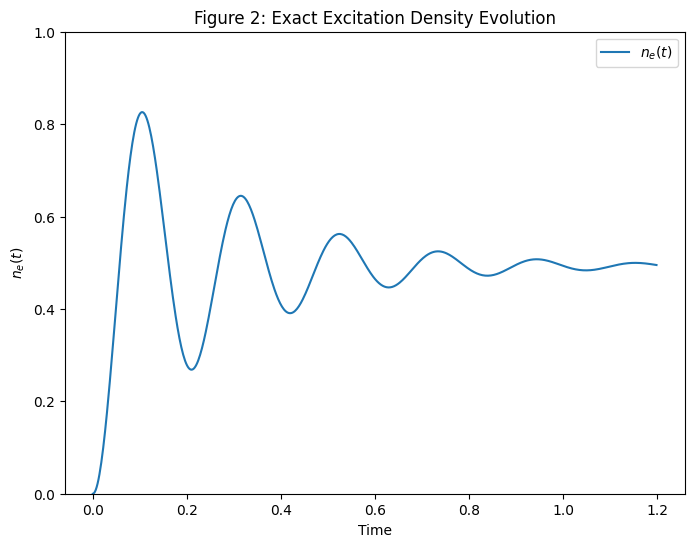

In [10]:
ne_exact_twoLevelSystem, ne_infty_twoLevelSystem = exact_twoLevelSystem(omega, gamma, phi_basis_vecs(1)[0], time_values_twoLevelSystem)
plot_excitation_density(time_values_twoLevelSystem, ne_exact_twoLevelSystem, 'Figure 2: Exact Excitation Density Evolution', 0)

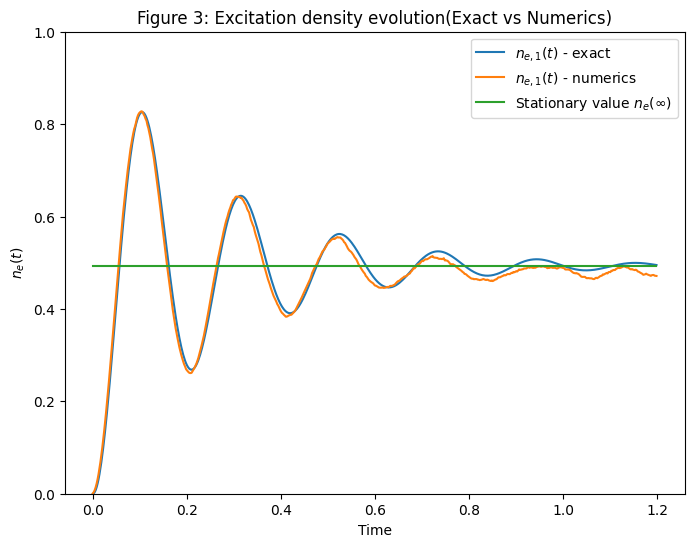

In [11]:
ne_comparison = [ne_exact_twoLevelSystem, ne_avg_twoLevelSystem, ne_infty_twoLevelSystem]
plot_excitation_density(time_values_twoLevelSystem, ne_comparison, 'Figure 3: Excitation density evolution(Exact vs Numerics)', 1)

In [2]:
omega = 15
gamma = 2 * omega / 3
H = omega * (S_x(2,1) + S_x(2,2))
L = (S_minus(2,1) + S_minus(2,2)) / np.sqrt(2)
total_time = 1.2
dt = 0.002

twoAtomSystem = QuantumSystem(H, gamma, L, dt)

In [3]:
states_twoAtomSystem_0, ne_twoAtomSystem_0, ne_avg_twoAtomSystem_0, time_values_twoAtomSystem_0 = N_trajectory_twoAtomSystem(
    2700, phi_basis_vecs(2)[0], total_time, dt, 0.005, twoAtomSystem)

100%|██████████| 2700/2700 [03:33<00:00, 12.66it/s]

Simulation complete


/usr/local/Caskroom/miniconda/base/envs/qiskit-env/lib/python3.10/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/Caskroom/miniconda/base/envs/qiskit-env/lib/python3.10/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


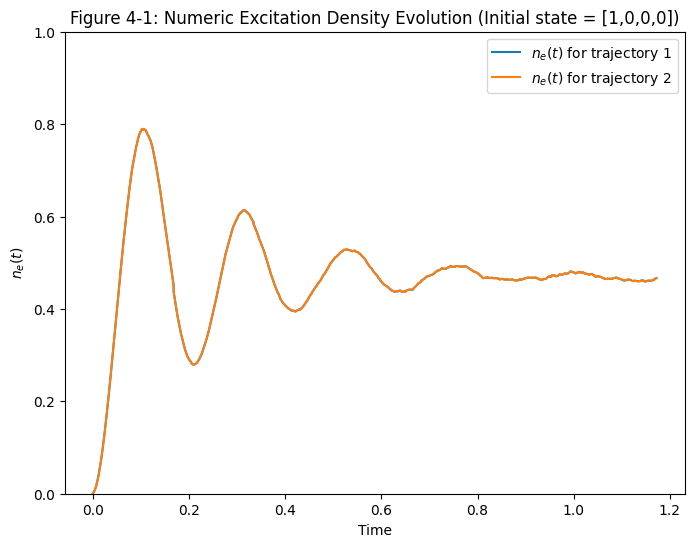

In [4]:
plot_excitation_density(time_values_twoAtomSystem_0, ne_avg_twoAtomSystem_0, 'Figure 4-1: Numeric Excitation Density Evolution (Initial state = [1,0,0,0])', 0)

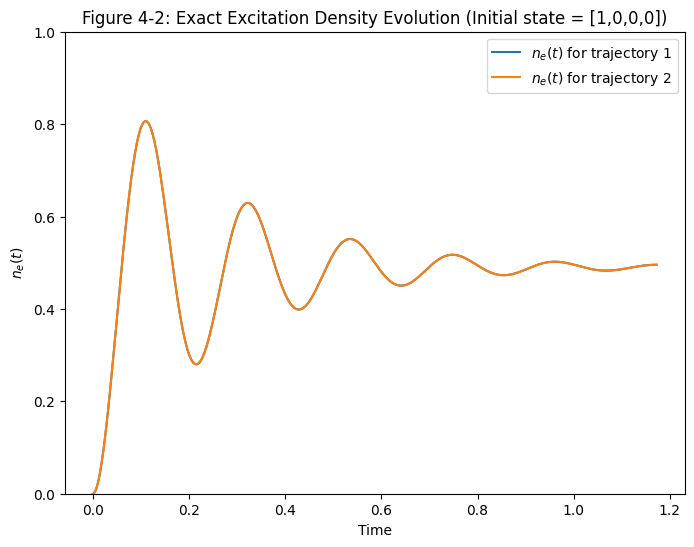

In [5]:
ne_exact_twoAtomSystem_0, ne_infty_twoAtomSystem_0 = exact_twoAtomSystem(omega, gamma, phi_basis_vecs(2)[0], time_values_twoAtomSystem_0, twoAtomSystem)
plot_excitation_density(time_values_twoAtomSystem_0, ne_exact_twoAtomSystem_0, 'Figure 4-2: Exact Excitation Density Evolution (Initial state = [1,0,0,0])', 0)

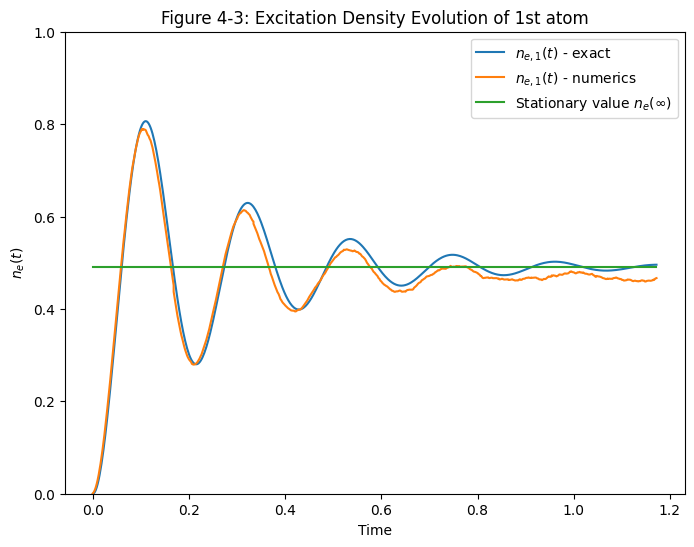

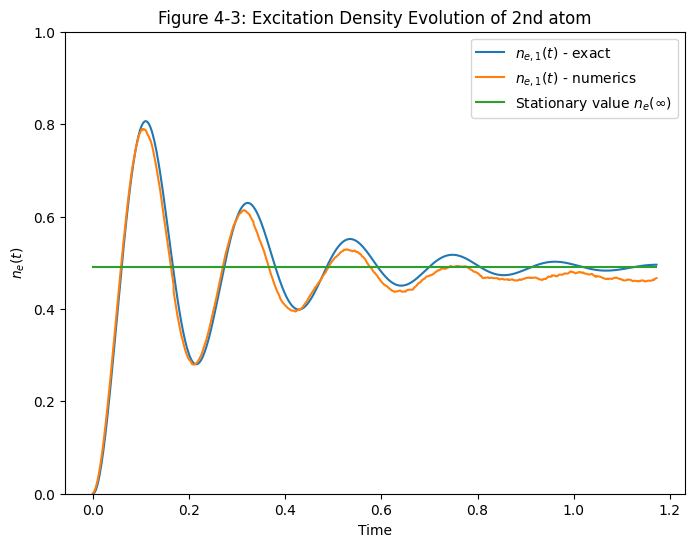

In [6]:
ne1_comparison_0 = [ne_exact_twoAtomSystem_0[0], ne_avg_twoAtomSystem_0[0], ne_infty_twoAtomSystem_0[0]]
ne2_comparison_0 = [ne_exact_twoAtomSystem_0[1], ne_avg_twoAtomSystem_0[1], ne_infty_twoAtomSystem_0[1]]

plot_excitation_density(time_values_twoAtomSystem_0, ne1_comparison_0, 'Figure 4-3: Excitation Density Evolution of 1st atom', 1)
plot_excitation_density(time_values_twoAtomSystem_0, ne2_comparison_0, 'Figure 4-3: Excitation Density Evolution of 2nd atom', 1)